In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('wine_rev.csv', index_col=0)
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [4]:
hive = data.loc[:, ['country', 'points', 'price', 'province', 'taster_name', 'title', 'winery']]
hive.head()

,country,points,price,province,taster_name,title,winery
0,Italy,87,NaN,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),Nicosia
1,Portugal,87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos
2,US,87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm
3,US,87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian
4,US,87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks


In [54]:
hive.groupby(['country', 'province', 'winery', 'title']).price.agg([min, max]).head()

min  \
country   province         winery         title                                                       
Argentina Mendoza Province 2 Copas        2 Copas 2009 Red (Mendoza)                            8.0   
                           Achaval-Ferrer Achaval-Ferrer 2006 Finca Altamira Malbec (La C...  112.0   
                                          Achaval-Ferrer 2007 Finca Mirador Malbec (Medrano)  112.0   
                                          Achaval-Ferrer 2007 Malbec (Mendoza)                 29.0   
                                          Achaval-Ferrer 2008 Finca Mirador Malbec (Mendoza)  120.0   

                                                                                                max  
country   province         winery         title                                                      
Argentina Mendoza Province 2 Copas        2 Copas 2009 Red (Mendoza)                            8.0  
                           Achaval-Ferrer Achaval-Ferrer 2006 Finca Altamira Malbec (La C...  112.0  
                                          Achaval-Ferrer 2007 Finca Mirador Malbec (Medrano)  112.0  
                                          Achaval-Ferrer 2007 Malbec (Mendoza)                 29.0  
                                          Achaval-Ferrer 2008 Finca Mirador Malbec (Mendoza)  120.0

In [6]:
data.loc[(data.country == 'Argentina') & (data.title == 'Altos Las Hormigas 2009 Malbec (Mendoza)')]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
24383,Argentina,"Opens with tarry, cooked aromas but with airin...",NaN,88,12.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Altos Las Hormigas 2009 Malbec (Mendoza),Malbec,Altos Las Hormigas
63936,Argentina,"Opens with tarry, cooked aromas but with airin...",NaN,88,12.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Altos Las Hormigas 2009 Malbec (Mendoza),Malbec,Altos Las Hormigas


In [7]:
# data.title.duplicate()

In [8]:
len(data.title.unique())

118840

In [9]:
data.shape

(129971, 13)

In [10]:
print(129971 - 118840)

11131


In [11]:
data.groupby('points').points.count().head()

points
80     397
81     692
82    1836
83    3025
84    6480
Name: points, dtype: int64

In [58]:
# data['points'].value_counts()

In [59]:
data.groupby('points').price.max()

points
80       69.0
81      130.0
82      150.0
83      225.0
84      225.0
85      320.0
86      170.0
87      800.0
88     3300.0
89      500.0
90      510.0
91     2013.0
92      750.0
93      770.0
94     1125.0
95      973.0
96     2500.0
97     2000.0
98     1900.0
99      850.0
100    1500.0
Name: price, dtype: float64

In [13]:
# data.winery.value_counts()

In [14]:
# data.winery.head(125)
data.winery.unique()

array(['Nicosia', 'Quinta dos Avidagos', 'Rainstorm', ...,
       'Mas de Pampelonne', 'Bodegas Eidosela', 'Penedo Borges'],
      dtype=object)

In [15]:
data['winery'].value_counts().head()

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
Name: winery, dtype: int64

In [16]:
data.groupby('winery').apply(lambda df: df.title.iloc[0]).head()

winery
1+1=3                                  1+1=3 NV Rosé Sparkling (Cava)
10 Knots                         10 Knots 2010 Viognier (Paso Robles)
100 Percent Wine           100 Percent Wine 2015 Moscato (California)
1000 Stories        1000 Stories 2013 Bourbon Barrel Aged Zinfande...
1070 Green               1070 Green 2011 Sauvignon Blanc (Rutherford)
dtype: object

In [17]:
data.groupby('country').apply(lambda df: df.winery.iloc[0]).head()

country
Argentina                 Felix Lavaque
Armenia                        Van Ardi
Australia                       Yalumba
Austria                           Fuchs
Bosnia and Herzegovina    Winery Čitluk
dtype: object

In [61]:
data.groupby('country').apply(lambda df: df.points.iloc[0])

country
Argentina                 87
Armenia                   87
Australia                 86
Austria                   88
Bosnia and Herzegovina    85
Brazil                    88
Bulgaria                  86
Canada                    92
Chile                     86
China                     89
Croatia                   88
Cyprus                    85
Czech Republic            85
Egypt                     84
England                   90
France                    87
Georgia                   88
Germany                   87
Greece                    89
Hungary                   90
India                     93
Israel                    90
Italy                     87
Lebanon                   91
Luxembourg                89
Macedonia                 88
Mexico                    88
Moldova                   87
Morocco                   90
New Zealand               88
Peru                      85
Portugal                  87
Romania                   87
Serbia                    87
Slovak

In [19]:
data.groupby('country').apply(lambda df: df.taster_name.iloc[0]).head()

country
Argentina                  Michael Schachner
Armenia                        Mike DeSimone
Australia                     Joe Czerwinski
Austria                     Anne Krebiehl MW
Bosnia and Herzegovina    Anna Lee C. Iijima
dtype: object

In [20]:
# data.groupby('winery').apply(lambda df: df.title.iloc[0])

In [21]:
data.groupby('taster_name').apply(lambda df: df.title.iloc[0])

taster_name
Alexander Peartree    St. Julian 2013 Reserve Late Harvest Riesling ...
Anna Lee C. Iijima    Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...
Anne Krebiehl MW               Fuchs 2015 Grüner Veltliner (Burgenland)
Carrie Dykes          The Williamsburg Winery 2015 A Midsummer Night...
Christina Pickard             Torbreck 2006 The Struie Shiraz (Barossa)
Fiona Adams               Gruet NV Blanc de Blancs Chardonnay (America)
Jeff Jenssen               Samuel Tinon 2015 Megyer Dry Furmint (Tokaj)
Jim Gordon                                Cocobon 2014 Red (California)
Joe Czerwinski        Yalumba 2016 Made With Organic Grapes Chardonn...
Kerin O’Keefe                         Nicosia 2013 Vulkà Bianco  (Etna)
Lauren Buzzeo          Spier 2014 21 Gables Chenin Blanc (Western Cape)
Matt Kettmann                  Mirassou 2012 Chardonnay (Central Coast)
Michael Schachner     Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...
Mike DeSimone                           Yatir 2011 S

In [22]:
data['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [23]:
data.groupby('taster_name').apply(lambda df: df.country.iloc[0])

taster_name
Alexander Peartree              US
Anna Lee C. Iijima         Germany
Anne Krebiehl MW           Austria
Carrie Dykes                    US
Christina Pickard        Australia
Fiona Adams                     US
Jeff Jenssen               Hungary
Jim Gordon                      US
Joe Czerwinski           Australia
Kerin O’Keefe                Italy
Lauren Buzzeo         South Africa
Matt Kettmann                   US
Michael Schachner            Spain
Mike DeSimone               Israel
Paul Gregutt                    US
Roger Voss                Portugal
Sean P. Sullivan                US
Susan Kostrzewa                 US
Virginie Boone                  US
dtype: object

In [24]:
data.groupby('winery').apply(lambda df: df.points.iloc[0]).head()

winery
1+1=3               86
10 Knots            84
100 Percent Wine    86
1000 Stories        91
1070 Green          88
dtype: int64

In [25]:
# data[data.winery == 'un4seen'].head()

In [26]:
# data[data.winery == 'Pol Roger']

In [27]:
# data[data.winery == '1+1=3']

In [28]:
data.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

country  \
country   province                         
Argentina Mendoza Province     Argentina   
          Other                Argentina   
Armenia   Armenia                Armenia   
Australia Australia Other      Australia   
          New South Wales      Australia   
          South Australia      Australia   
          Tasmania             Australia   
          Victoria             Australia   
          Western Australia    Australia   
Austria   Austria                Austria   
          Burgenland             Austria   
          Carnuntum              Austria   
          Eisenberg              Austria   
          Kamptal                Austria   
          Kremstal               Austria   
          Leithaberg             Austria   
          Mittelburgenland       Austria   
          Neusiedlersee          Austria   
          Niederösterreich       Austria   
          Steiermark             Austria   
          Südburgenland          Austria   
          Südoststeiermark       Austria   
          Südsteiermark          Austria   
          Thermenregion          Austria   
          Traisental             Austria   
          Vienna                 Austria   
          Wachau                 Austria   
          Wagram                 Austria   
          Wagram-Donauland       Austria   
          Weinland Österreich    Austria   
...                                  ...   
US        Hawaii                      US   
          Idaho                       US   
          Illinois                    US   
          Iowa                        US   
          Kentucky                    US   
          Massachusetts               US   
          Michigan                    US   
          Missouri                    US   
          Nevada                      US   
          New Jersey                  US   
          New Mexico                  US   
          New York                    US   
          North Carolina              US   
          Ohio                        US   
          Oregon                      US   
          Pennsylvania                US   
          Rhode Island                US   
          Texas                       US   
          Vermont                     US   
          Virginia                    US   
          Washington                  US   
          Washington-Oregon           US   
Ukraine   Ukraine                Ukraine   
Uruguay   Atlantida              Uruguay   
          Canelones              Uruguay   
          Juanico                Uruguay   
          Montevideo             Uruguay   
          Progreso               Uruguay   
          San Jose               Uruguay   
          Uruguay                Uruguay   

                                                                     description  \
country   province                                                                 
Argentina Mendoza Province     If the color doesn't tell the full story, the ...   
          Other                Take note, this could be the best wine Colomé ...   
Armenia   Armenia              Deep salmon in color, this wine offers a bouqu...   
Australia Australia Other      Writes the book on how to make a wine filled w...   
          New South Wales      De Bortoli's Noble One is as good as ever in 2...   
          South Australia      This inky, embryonic wine deserves to be cella...   
          Tasmania             The Pinot Noir is no slouch either, but Tolpud...   
          Victoria             This wine contains some material over 100 year...   
          Western Australia    Perhaps the best young wine I've tasted from M...   
Austria   Austria              The pair to this wine is Nummer 3 in the Krach...   
          Burgenland           Opulent honey and lemon aromas waft from the g...   
          Carnuntum            Very pure and lifted notes of red cherry are h...   
          Eisenberg            Dark red and black-cherry fruit is clothed in ...   


In [29]:
data.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmin()])

country  \
country   province                         
Argentina Mendoza Province     Argentina   
          Other                Argentina   
Armenia   Armenia                Armenia   
Australia Australia Other      Australia   
          New South Wales      Australia   
          South Australia      Australia   
          Tasmania             Australia   
          Victoria             Australia   
          Western Australia    Australia   
Austria   Austria                Austria   
          Burgenland             Austria   
          Carnuntum              Austria   
          Eisenberg              Austria   
          Kamptal                Austria   
          Kremstal               Austria   
          Leithaberg             Austria   
          Mittelburgenland       Austria   
          Neusiedlersee          Austria   
          Niederösterreich       Austria   
          Steiermark             Austria   
          Südburgenland          Austria   
          Südoststeiermark       Austria   
          Südsteiermark          Austria   
          Thermenregion          Austria   
          Traisental             Austria   
          Vienna                 Austria   
          Wachau                 Austria   
          Wagram                 Austria   
          Wagram-Donauland       Austria   
          Weinland Österreich    Austria   
...                                  ...   
US        Hawaii                      US   
          Idaho                       US   
          Illinois                    US   
          Iowa                        US   
          Kentucky                    US   
          Massachusetts               US   
          Michigan                    US   
          Missouri                    US   
          Nevada                      US   
          New Jersey                  US   
          New Mexico                  US   
          New York                    US   
          North Carolina              US   
          Ohio                        US   
          Oregon                      US   
          Pennsylvania                US   
          Rhode Island                US   
          Texas                       US   
          Vermont                     US   
          Virginia                    US   
          Washington                  US   
          Washington-Oregon           US   
Ukraine   Ukraine                Ukraine   
Uruguay   Atlantida              Uruguay   
          Canelones              Uruguay   
          Juanico                Uruguay   
          Montevideo             Uruguay   
          Progreso               Uruguay   
          San Jose               Uruguay   
          Uruguay                Uruguay   

                                                                     description  \
country   province                                                                 
Argentina Mendoza Province     Ashy, green and funky smelling, then sweet, ch...   
          Other                Yellowish in color, a true indicator that this...   
Armenia   Armenia              Medium straw in the glass, this wine has a nos...   
Australia Australia Other      Odd notes of Pez candy and confectioner's suga...   
          New South Wales      Light to medium in body and rather tart, with ...   
          South Australia      This inexpensive Aussie Shiraz seems to have d...   
          Tasmania             This already mature wine starts off with aroma...   
          Victoria             Excessively volatile, with some briary, berry-...   
          Western Australia    Seems prematurely aged, with slight bricking a...   
Austria   Austria              Vaguely Chardonnay-like, with peppery, peach a...   
          Burgenland           A Sauvignon Blanc with a Muscat aroma? That's ...   
          Carnuntum            With refreshingly tart blackberry fruit, this ...   
          Eisenberg            Full of red fruits, this solid and chunky, but...   


In [62]:
# Who gave the maximum points in each country
data.groupby(['country', 'taster_name']).apply(lambda df: df.loc[df.points.idxmax()])

country  \
country                taster_name                                  
Argentina              Michael Schachner                Argentina   
Armenia                Mike DeSimone                      Armenia   
Australia              Christina Pickard                Australia   
                       Joe Czerwinski                   Australia   
Austria                Anne Krebiehl MW                   Austria   
                       Roger Voss                         Austria   
Bosnia and Herzegovina Anna Lee C. Iijima  Bosnia and Herzegovina   
                       Jeff Jenssen        Bosnia and Herzegovina   
Brazil                 Michael Schachner                   Brazil   
Bulgaria               Anna Lee C. Iijima                Bulgaria   
                       Jeff Jenssen                      Bulgaria   
                       Mike DeSimone                     Bulgaria   
                       Susan Kostrzewa                   Bulgaria   
Canada                 Anna Lee C. Iijima                  Canada   
                       Joe Czerwinski                      Canada   
                       Lauren Buzzeo                       Canada   
                       Paul Gregutt                        Canada   
                       Sean P. Sullivan                    Canada   
                       Susan Kostrzewa                     Canada   
Chile                  Joe Czerwinski                       Chile   
                       Matt Kettmann                        Chile   
                       Michael Schachner                    Chile   
China                  Mike DeSimone                        China   
Croatia                Anna Lee C. Iijima                 Croatia   
                       Jeff Jenssen                       Croatia   
                       Susan Kostrzewa                    Croatia   
Cyprus                 Susan Kostrzewa                     Cyprus   
Czech Republic         Anna Lee C. Iijima          Czech Republic   
                       Jeff Jenssen                Czech Republic   
Egypt                  Susan Kostrzewa                      Egypt   
...                                                           ...   
Slovenia               Jeff Jenssen                      Slovenia   
South Africa           Lauren Buzzeo                 South Africa   
                       Roger Voss                    South Africa   
                       Susan Kostrzewa               South Africa   
Spain                  Joe Czerwinski                       Spain   
                       Lauren Buzzeo                        Spain   
                       Michael Schachner                    Spain   
                       Paul Gregutt                         Spain   
Switzerland            Jeff Jenssen                   Switzerland   
                       Susan Kostrzewa                Switzerland   
Turkey                 Anna Lee C. Iijima                  Turkey   
                       Mike DeSimone                       Turkey   
US                     Alexander Peartree                      US   
                       Anna Lee C. Iijima                      US   
                       Carrie Dykes                            US   
                       Christina Pickard                       US   
                       Fiona Adams                             US   
                       Jim Gordon                              US   
                       Joe Czerwinski                          US   
                       Lauren Buzzeo                           US   
                       Matt Kettmann                           US   
                       Michael Schachner                       US   
                       Paul Gregutt                            US   
                       Roger Voss                              US   
                       Sean P. Sullivan                        US   
                       Susan Kostrzewa                  

In [30]:
# Aggregate
len(data[data['country'] == 'Argentina'])

3800

In [31]:
# By country and aggregating the length, min as well as max price
data.groupby('country').price.agg([len, min, max]).head()

,len,min,max
country,,,
Argentina,3800.0,4.0,230.0
Armenia,2.0,14.0,15.0
Australia,2329.0,5.0,850.0
Austria,3345.0,7.0,1100.0
Bosnia and Herzegovina,2.0,12.0,13.0


In [32]:
data.price.max()

3300.0

In [33]:
data.price.min()

4.0

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
x = data['points']

y = data['price']

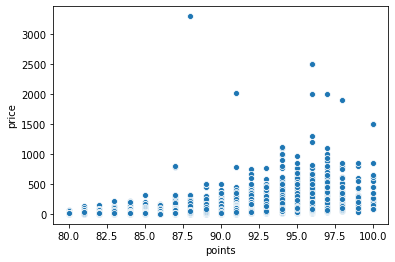

In [36]:
sns.scatterplot(x=x, y=y)

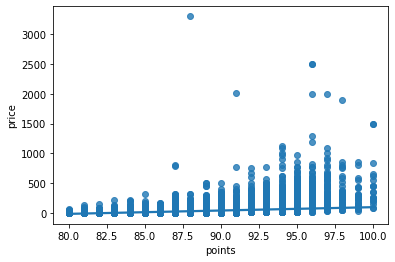

In [37]:
sns.regplot(x=x, y=y)

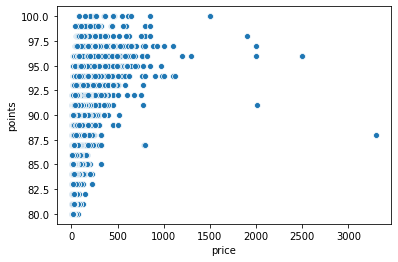

In [38]:
sns.scatterplot(x=y, y=x)

In [39]:
data['price'].mean()

35.363389129985535

In [40]:
data['how'] = data['price'].apply(lambda p: p - data['price'].mean())

In [41]:
data.head(150)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,how
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-20.363389
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-21.363389
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-22.363389
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,29.636611
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,-20.363389
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,-19.363389
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,-11.363389
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,-23.363389
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,-8.363389


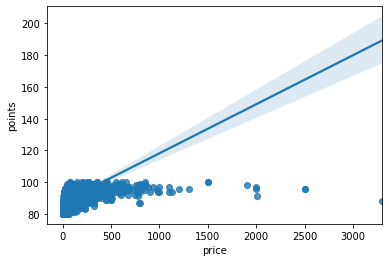

In [42]:
sns.regplot(x=y, y=x)

In [63]:
data.loc[data['price'] >= 500].head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,how
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",Kiedrich Gräfenberg Trockenbeerenauslese,97,775.0,Rheingau,NaN,NaN,Anna Lee C. Iijima,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil,739.636611
353,France,"This beautiful, rich wine has yellow fruits an...",Le Montrachet,96,630.0,Burgundy,Montrachet,NaN,Roger Voss,@vossroger,Louis Latour 2014 Le Montrachet (Montrachet),Chardonnay,Louis Latour,594.636611
1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux,1864.636611
1566,France,"Such a generous and ripe wine, with a dark cor...",NaN,97,1100.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château La Mission Haut-Brion 2009 Pessac-Léo...,Bordeaux-style Red Blend,Château La Mission Haut-Brion,1064.636611
1571,France,"Solid, very structured, packed with dense and ...",NaN,96,1200.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château Haut-Brion 2009 Pessac-Léognan,Bordeaux-style Red Blend,Château Haut-Brion,1164.636611


In [44]:
data.loc[data.price <=50].head(150)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,how
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,-20.363389
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,-21.363389
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,-22.363389
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,-20.363389
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,-19.363389
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,-11.363389
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,-23.363389
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,-8.363389
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,-16.363389
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,-5.363389


In [65]:
four = data.loc[(data['country'] == 'US') & (data['price'] >= 500)]

four

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,how
15135,US,This is a hugely structured and concentrated w...,Double Plus Estate Grown,93,500.0,California,Rutherford,Napa,Virginie Boone,@vboone,Hewitt 2013 Double Plus Estate Grown Cabernet ...,Cabernet Sauvignon,Hewitt,464.636611
25382,US,"As imposing as the athlete himself, this is an...",Family Reserve,94,625.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Yao Ming 2011 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,589.636611
38978,US,We can debate the pricing on Yao Ming's new re...,Family Reserve,98,625.0,California,Napa Valley,Napa,NaN,NaN,Yao Ming 2010 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,589.636611
51978,US,"This is a powerful bottling, as is expected by...",Intrepid,92,750.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Law 2013 Intrepid Syrah (Paso Robles),Syrah,Law,714.636611
83852,US,The former basketball star's initial release i...,Family Reserve,97,625.0,California,Napa Valley,Napa,NaN,NaN,Yao Ming 2009 Family Reserve Cabernet Sauvigno...,Cabernet Sauvignon,Yao Ming,589.636611
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair,1977.636611
124436,US,"Here's a big, flashy, cult-style wine if ever ...",NaN,94,500.0,California,Napa Valley,Napa,NaN,NaN,Harlan Estate 2006 Red (Napa Valley),Bordeaux-style Red Blend,Harlan Estate,464.636611


In [46]:
# plt.figure(figsize=(12, 8))
# sns.barplot(four['province'])

In [47]:
multi  = data.groupby(['country', 'province']).description.agg([len])
multi.head()

len
country   province              
Argentina Mendoza Province  3264
          Other              536
Armenia   Armenia              2
Australia Australia Other    245
          New South Wales     85

In [48]:
type(multi.index)

pandas.core.indexes.multi.MultiIndex

In [49]:
data.loc[(data['country'] == 'Argentina') & (data['province'].isin(['Mendoza Province', 'Other']))].shape

(3800, 14)

In [50]:
data.groupby('country').description.agg([len]).head()

,len
country,
Argentina,3800
Armenia,2
Australia,2329
Austria,3345
Bosnia and Herzegovina,2


In [51]:
buda = data.groupby(['country', 'province']).description.agg([len])
buda.head()

len
country   province              
Argentina Mendoza Province  3264
          Other              536
Armenia   Armenia              2
Australia Australia Other    245
          New South Wales     85

In [52]:
type(buda.index)

pandas.core.indexes.multi.MultiIndex

In [53]:
buda_reset = buda.reset_index()
buda_reset.head(10)

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
2,Armenia,Armenia,2
3,Australia,Australia Other,245
4,Australia,New South Wales,85
5,Australia,South Australia,1349
6,Australia,Tasmania,42
7,Australia,Victoria,322
8,Australia,Western Australia,286
9,Austria,Austria,26
